# Многомерная нелинейная оптимизация

$$f(x) = x_1^3 - x_1 x_2 + x_2^2 - 2x_1 + 3x_2 - 4 \rightarrow extr, \; x^0 = (1;0)$$

По формуле Тейлора с остаточным членом в форме Пеано:

$$f(x) = f(x^0) + \nabla f(x^0) (x - x^0) + \dfrac{1}{2}(x-x^0)^T H_f(x^0)(x-x^0) + o(||x-x^0||^2)$$

$f(x_0) = 1^3 - 0 + 0 - 2 + 0 - 4 = -5$ 

$\nabla f(x) = (3x_1^2 - x_2 - 2,\; -x_1 + 2x_2+ 3) \rightarrow \nabla f(x^0) = (1,\; 2)$

$ H_f(x) = \begin{pmatrix}
    6x_1 & -1 \\
    -1 & 2
\end{pmatrix} \rightarrow H_f(x^0) = 
\begin{pmatrix}
    6 & -1 \\
    -1 & 2
\end{pmatrix}  $

$g(x) = f(x^0) + \nabla f(x^0) (x - x^0) + \dfrac{1}{2}(x-x^0)^T H_f(x^0)(x-x^0)$

$g(x) = -5 + (1,\; 2) \begin{pmatrix} x_1 - 1 \\ x_2 \end{pmatrix} + \dfrac{1}{2} (x_1 - 1, \; x_2) 
\begin{pmatrix} 6 & -1 \\ -1 & 2 \end{pmatrix} \begin{pmatrix} x_1 - 1 \\ x_2 \end{pmatrix}$

$g(x) = 3 x_1^2 + x_2^2 - x_1 x_2 - 5 x_1 + 3x_2 - 3$

### Функции

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def f(x1, x2):
    return x1**3 - x1*x2 + x2**2 - 2*x1 + 3*x2 - 4

def g(x1, x2):
    return 3*x1**2 + x2**2 - x1*x2 - 5*x1 + 3*x2 - 3

Text(0, 0.5, 'x2')

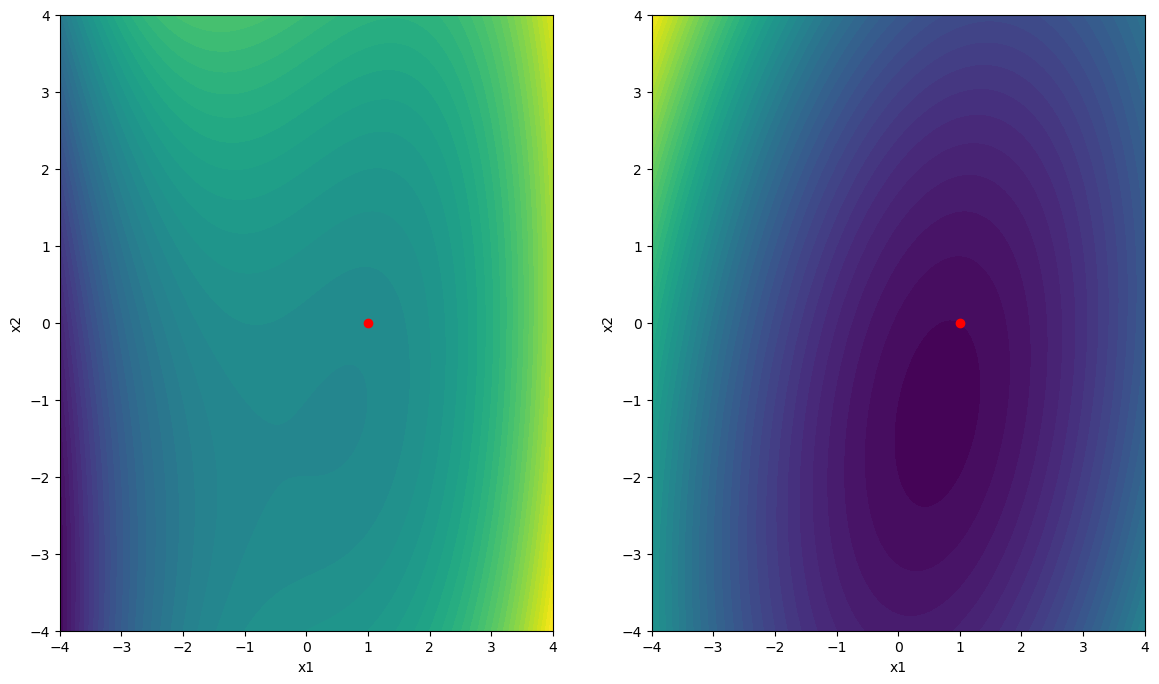

In [8]:
# Посмотрим на функцию

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

xgrid, ygrid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))


ax1.contourf(xgrid, ygrid, f(xgrid, ygrid), levels=50)
ax1.scatter(1, 0, c="r")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")



ax2.contourf(xgrid, ygrid, g(xgrid, ygrid), levels=50)
ax2.scatter(1, 0, c="r")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

Text(0.5, 0.5, 'x2')

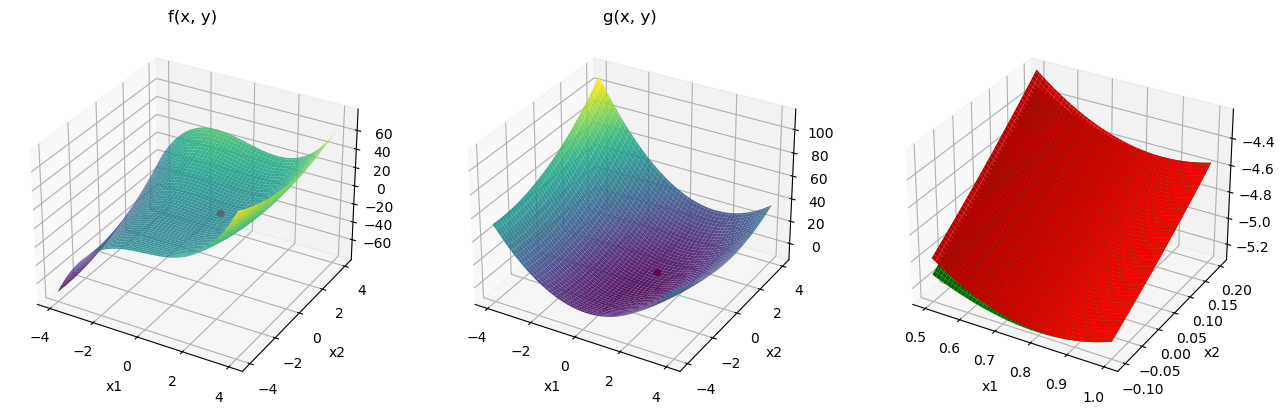

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), subplot_kw={'projection': '3d'})

xgrid, ygrid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))


ax1.plot_surface(xgrid, ygrid, f(xgrid, ygrid), cmap="viridis", alpha=0.9)
ax1.scatter(1, 0, c="r")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("f(x, y)")


ax2.plot_surface(xgrid, ygrid, g(xgrid, ygrid), cmap="viridis", alpha=0.9)
ax2.scatter(1, 0, c="r")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("g(x, y)")

xgrid1, ygrid1 = np.meshgrid(np.linspace(0.5, 1, 100), np.linspace(-0.1, 0.2, 100))


ax3.plot_surface(xgrid1, ygrid1, f(xgrid1, ygrid1), color='g', alpha=1, label='f')
ax3.plot_surface(xgrid1, ygrid1, g(xgrid1, ygrid1), color='r', alpha=1, label='g')
# ax3.set_xlim(-0.1, 0.1)
# ax3.set_ylim(-0.1, 0.1)
# ax3.scatter(0, 1, c="r")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
# ax3.set_legend()




Зелёный -- $f$, а красный -- $g$

### Выпуклость $g$

Для этого нужно рассмотреть матрицу и понять: как она определена

$$H_f(x^0) = 
\begin{pmatrix}
    6 & -1 \\
    -1 & 2
\end{pmatrix}$$

Рассмотрим критерий Сильвестра:

$\Delta_1 = 6 > 0$, $\Delta_2 = 12 + 1 = 13 > 0$, получается, что $H_f(x^0) > 0$, тогда $g$ строго выпуклая функция